# Importando as bibliotecas

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 35.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    BaggingClassifier,
)
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

# Definição das funções

In [ ]:
def get_list_paths(path: str) -> list:
    """
    Get the list of paths from a directory.

    Args:
        path (str): Path to the directory.

    Returns:
        list: List of paths.
    """

    return [path + file for file in os.listdir(path) if ".csv" in file]


def read_selected_data(list_paths: list, columns: list) -> pd.DataFrame:
  """
    Read all the data with .csv extension from the list of paths and return a list of dataframes,
    selecting only specified columns.

    Args:
        list_paths (list): List of paths to the data.
        columns (list): List of columns to be included in the returned dataframes.

    Returns:
        list: List of dataframes (one dataframe per file), with selected columns.
  """
  # List comprehension to read each csv file and select only the specified columns
  return [pd.read_csv(path, usecols=columns) for path in list_paths if ".csv" in path]

def concatenate_dataframes(list_df: list) -> pd.DataFrame:
    """
    Concatenate a list of dataframes.

    Args:
        list_df (list): List of dataframes.

    Returns:
        pd.DataFrame: Dataframe with all the dataframes concatenated.
    """

    return pd.concat(list_df, ignore_index=True)

def is_convertible_to_float(value):
    try:
        float(value)
        return True
    except (ValueError, TypeError):
        return False

# Função para dividir os dados em treino, validação e teste
def split_data(df, train_size, valid_size, test_size):
    # Primeira divisão: separando treino do restante
    df_train, df_temp = train_test_split(df, train_size=train_size, shuffle=True, random_state=42)
    # Ajustando as proporções para a divisão seguinte
    proportion = valid_size / (valid_size + test_size)
    # Segunda divisão: separando validação e teste
    df_valid, df_test = train_test_split(df_temp, train_size=proportion, shuffle=True, random_state=42)
    return df_train, df_valid, df_test

# Função para normalizar os dados
def normalize(df, means, stds):
    df_normalized = df.copy()
    for column in numeric_columns:
        df_normalized[column] = (df[column] - means[column]) / stds[column]
    return df_normalized

# Verificar se há interseção entre conjuntos
def check_intersection(df1, df2):
    return any(df1.drop(columns=['F_Type']).merge(df2.drop(columns=['F_Type']), how='inner').duplicated())


# Conectar ao drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Leitura e Processamento dos dados

A colunas selecionadas foram escolhidas com base na disponibilidade dos sesores no Freematics

In [ ]:
dataframes = []

# Colunas desejadas
colunas_selecionadas = [
    'Engine Load(%)', 'Engine Coolant Temperature(°C)', 'Fuel Trim Bank 1 Short Term(%)',
    'Fuel Trim Bank 1 Long Term(%)', 'Engine RPM(rpm)', 'Intake Air Temperature(°C)',
    'Timing Advance(°)', 'Mass Air Flow Rate(g/s)', 'Run time since engine start(s)',
    'Barometric pressure (from vehicle)(psi)', 'Catalyst Temperature (Bank 1 Sensor 1)(°C)',
    'Voltage (Control Module)(V)','Engine Load(Absolute)(%)',
    'Air Fuel Ratio(Commanded)(:1)', 'Relative Throttle Position(%)',
    'Absolute Throttle Position B(%)', 'Accelerator PedalPosition D(%)',
    'Accelerator PedalPosition E(%)', 'F_Type'
]

DATA_PATH = "/content/drive/MyDrive/PESQUISA/CBA/Logs/NewTest/PostProcess/Raw/"

Dados do **Nissan Kicks, Honda Fit, Hyundai Creta, Hyundai HB20 e Fiat Mobi**

In [ ]:
dataframes = get_list_paths(DATA_PATH)

In [ ]:
all_data = read_selected_data(dataframes, colunas_selecionadas)

In [ ]:
concatenated_data = concatenate_dataframes(all_data)

Visualizando o DataFrame:

In [ ]:
concatenated_data

,Engine Load(Absolute)(%),Engine Load(%),Fuel Trim Bank 1 Long Term(%),Fuel Trim Bank 1 Short Term(%),Absolute Throttle Position B(%),Accelerator PedalPosition D(%),Accelerator PedalPosition E(%),Relative Throttle Position(%),Barometric pressure (from vehicle)(psi),Engine RPM(rpm),Timing Advance(°),Air Fuel Ratio(Commanded)(:1),Mass Air Flow Rate(g/s),Intake Air Temperature(°C),Catalyst Temperature (Bank 1 Sensor 1)(°C),Engine Coolant Temperature(°C),Run time since engine start(s),Voltage (Control Module)(V),F_Type
0,35.686275,30.588236,-3.125,-0.78125,12.941176,14.509804,7.45098,2.352941,14.503774,887.0,2.0,14.699552,-,41,406.100006,69,154,13.753,0
1,35.686275,30.588236,-3.125,-0.78125,12.941176,14.509804,7.45098,2.352941,14.503774,892.5,2.0,14.699552,-,41,406.100006,69,154,13.753,0
2,35.686275,31.372549,-3.125,0.00000,12.941176,14.509804,7.45098,2.352941,14.503774,892.5,2.0,14.699552,-,41,406.100006,69,154,13.729,0
3,35.686275,31.372549,-3.125,0.00000,12.941176,14.509804,7.45098,2.352941,14.503774,892.5,2.0,14.699552,-,41,409.100006,69,154,13.729,0
4,34.901962,31.372549,-3.125,0.00000,12.54902,14.509804,7.45098,2.745098,14.503774,892.5,2.0,14.699552,-,41,409.100006,69,154,13.729,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156677,40.39,40.000000,-3.91,-6.25000,17.25,20.0,7.45,7.45,14.500000,1393.5,17.0,14.7,7.63,35,610.3,87,2450,13.500,1
156678,27.84,43.530000,-3.91,-3.12000,13.73,14.9,7.45,3.92,14.500000,876.5,-5.5,14.7,3.19,35,610.3,87,2451,14.060,1
156679,23.53,32.160000,-5.47,-7.03000,12.94,14.9,7.45,3.14,14.500000,876.5,-3.0,14.7,3.19,35,610.3,87,2452,13.940,1
156680,23.53,34.900000,-5.47,-7.81000,12.94,14.9,7.45,3.14,14.500000,821.0,-3.0,14.7,4.08,36,610.3,87,2452,13.940,1


Identificando colunas não numéricas e não conversíveis para float

In [ ]:
# Lista das colunas problemáticas
prob = []

for col in concatenated_data.columns:
    try:
        # Tenta converter a coluna para float
        concatenated_data[col].astype(float)
    except ValueError:
        # Se houver um erro, a coluna contém valores não convertíveis
        prob.append(col)
        print(f"A coluna '{col}' contém valores não numéricos ou não conversíveis para float.")

A coluna 'Engine Load(Absolute)(%)' contém valores não numéricos ou não conversíveis para float.
A coluna 'Fuel Trim Bank 1 Long Term(%)' contém valores não numéricos ou não conversíveis para float.
A coluna 'Absolute Throttle Position B(%)' contém valores não numéricos ou não conversíveis para float.
A coluna 'Accelerator PedalPosition D(%)' contém valores não numéricos ou não conversíveis para float.
A coluna 'Accelerator PedalPosition E(%)' contém valores não numéricos ou não conversíveis para float.
A coluna 'Relative Throttle Position(%)' contém valores não numéricos ou não conversíveis para float.
A coluna 'Air Fuel Ratio(Commanded)(:1)' contém valores não numéricos ou não conversíveis para float.
A coluna 'Mass Air Flow Rate(g/s)' contém valores não numéricos ou não conversíveis para float.
A coluna 'Catalyst Temperature (Bank 1 Sensor 1)(°C)' contém valores não numéricos ou não conversíveis para float.
A coluna 'Run time since engine start(s)' contém valores não numéricos ou nã

Lidando com as colunas problematicas

In [ ]:
# Dicionário para armazenar os valores não numéricos de cada coluna problemática
non_numeric_values = {}

# Verifica cada coluna problemática
for col in prob:
    non_convertible_mask = ~concatenated_data[col].apply(is_convertible_to_float)
    non_convertible_values = concatenated_data[col][non_convertible_mask].unique()
    non_numeric_values[col] = {
        'values': non_convertible_values,
        'count': non_convertible_mask.sum(),
        'percentage': 100 * non_convertible_mask.mean()
    }

# Exibindo os valores não numéricos e a porcentagem encontrados em cada coluna
for col, info in non_numeric_values.items():
    print(f"A coluna '{col}' contém os seguintes valores não numéricos ou não conversíveis para float: {info['values']}")
    print(f"Quantidade de valores não conversíveis: {info['count']} ({info['percentage']:.2f}%)")
    print("\n")  # Adiciona uma linha em branco para separação visual


A coluna 'Engine Load(Absolute)(%)' contém os seguintes valores não numéricos ou não conversíveis para float: ['-']
Quantidade de valores não conversíveis: 1 (0.00%)


A coluna 'Fuel Trim Bank 1 Long Term(%)' contém os seguintes valores não numéricos ou não conversíveis para float: ['-']
Quantidade de valores não conversíveis: 2751 (1.76%)


A coluna 'Absolute Throttle Position B(%)' contém os seguintes valores não numéricos ou não conversíveis para float: ['-']
Quantidade de valores não conversíveis: 1 (0.00%)


A coluna 'Accelerator PedalPosition D(%)' contém os seguintes valores não numéricos ou não conversíveis para float: ['-']
Quantidade de valores não conversíveis: 1 (0.00%)


A coluna 'Accelerator PedalPosition E(%)' contém os seguintes valores não numéricos ou não conversíveis para float: ['-']
Quantidade de valores não conversíveis: 1 (0.00%)


A coluna 'Relative Throttle Position(%)' contém os seguintes valores não numéricos ou não conversíveis para float: ['-']
Quantidade d


---
Como a porcentagem é pequena em relação ao todo, resolvi apenas remover as linhas "problemáticas"

In [ ]:
# Removendo linhas onde qualquer uma das colunas problemáticas contém '-'
for col in prob:
    original_count = len(concatenated_data)
    concatenated_data = concatenated_data[concatenated_data[col] != '-']
    removed_count = original_count - len(concatenated_data)
    print(f"Removidas {removed_count} linhas devido a valores inválidos na coluna '{col}'.")

# Exibindo informações do DataFrame após a limpeza
print("\nDataFrame após a remoção de valores inválidos:")
print(concatenated_data.info())

Removidas 1 linhas devido a valores inválidos na coluna 'Engine Load(Absolute)(%)'.
Removidas 2751 linhas devido a valores inválidos na coluna 'Fuel Trim Bank 1 Long Term(%)'.
Removidas 0 linhas devido a valores inválidos na coluna 'Absolute Throttle Position B(%)'.
Removidas 0 linhas devido a valores inválidos na coluna 'Accelerator PedalPosition D(%)'.
Removidas 0 linhas devido a valores inválidos na coluna 'Accelerator PedalPosition E(%)'.
Removidas 0 linhas devido a valores inválidos na coluna 'Relative Throttle Position(%)'.
Removidas 0 linhas devido a valores inválidos na coluna 'Air Fuel Ratio(Commanded)(:1)'.
Removidas 675 linhas devido a valores inválidos na coluna 'Mass Air Flow Rate(g/s)'.
Removidas 0 linhas devido a valores inválidos na coluna 'Catalyst Temperature (Bank 1 Sensor 1)(°C)'.
Removidas 0 linhas devido a valores inválidos na coluna 'Run time since engine start(s)'.

DataFrame após a remoção de valores inválidos:
<class 'pandas.core.frame.DataFrame'>
Index: 15325

---
Convertendo colunas do tipo `object` para `float`

In [ ]:
for col in prob:
    concatenated_data[col] = pd.to_numeric(concatenated_data[col], errors='coerce')

# Verificando novamente as informações do DataFrame após conversão
print(concatenated_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 153255 entries, 3427 to 156681
Data columns (total 19 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Engine Load(Absolute)(%)                    153255 non-null  float64
 1   Engine Load(%)                              153255 non-null  float64
 2   Fuel Trim Bank 1 Long Term(%)               153255 non-null  float64
 3   Fuel Trim Bank 1 Short Term(%)              153255 non-null  float64
 4   Absolute Throttle Position B(%)             153255 non-null  float64
 5   Accelerator PedalPosition D(%)              153255 non-null  float64
 6   Accelerator PedalPosition E(%)              153255 non-null  float64
 7   Relative Throttle Position(%)               153255 non-null  float64
 8   Barometric pressure (from vehicle)(psi)     153255 non-null  float64
 9   Engine RPM(rpm)                             153255 non-null  float64
 10

In [ ]:
concatenated_data.isna().sum()

Engine Load(Absolute)(%)                      0
Engine Load(%)                                0
Fuel Trim Bank 1 Long Term(%)                 0
Fuel Trim Bank 1 Short Term(%)                0
Absolute Throttle Position B(%)               0
Accelerator PedalPosition D(%)                0
Accelerator PedalPosition E(%)                0
Relative Throttle Position(%)                 0
Barometric pressure (from vehicle)(psi)       0
Engine RPM(rpm)                               0
Timing Advance(°)                             0
Air Fuel Ratio(Commanded)(:1)                 0
Mass Air Flow Rate(g/s)                       0
Intake Air Temperature(°C)                    0
Catalyst Temperature (Bank 1 Sensor 1)(°C)    0
Engine Coolant Temperature(°C)                0
Run time since engine start(s)                0
Voltage (Control Module)(V)                   0
F_Type                                        0
dtype: int64

# Balanceamento e Separação dos dados

A separação dos dados foi feita por primeiro por pelas classes, depois foi feito um *undersampling* da base maior para atingir um balanceamento dos dados.

Além disso, a separação dos dados visou a criação de uma base de dados para treino maior, sendo assim a proporção ficou a seguinte:
- 85% - Treinamento
- 10% - Validação
- 5% - Teste

In [ ]:
# Contando as instâncias de cada classe em 'F_Type'
class_counts = concatenated_data['F_Type'].value_counts()
print(f"Contagem original por classe:\n{class_counts}")
print("\n-----------------------------\n")

# Encontrando o número da classe minoritária
min_class_count = class_counts.min()

# Separando os DataFrames por classe
df_class_0 = concatenated_data[concatenated_data['F_Type'] == 0]
df_class_1 = concatenated_data[concatenated_data['F_Type'] == 1]

# Reduzindo a classe majoritária
df_class_0_under = df_class_0.sample(min_class_count, random_state=26)
df_class_1_under = df_class_1  # Mantém todos os dados da classe minoritária

# Aplicando a função de divisão para cada classe
train_0, valid_0, test_0 = split_data(df_class_0_under, 0.85, 0.1, 0.05)
train_1, valid_1, test_1 = split_data(df_class_1_under, 0.85, 0.1, 0.05)

# Combinando as classes nos conjuntos de treino, validação e teste
df_train = pd.concat([train_0, train_1]).sample(frac=1).reset_index(drop=True)
df_valid = pd.concat([valid_0, valid_1]).sample(frac=1).reset_index(drop=True)
df_test = pd.concat([test_0, test_1]).sample(frac=1).reset_index(drop=True)

# Exibindo as contagens de cada conjunto
print(f"Treino:\n{df_train['F_Type'].value_counts()}\n")
print(f"Validação:\n{df_valid['F_Type'].value_counts()}\n")
print(f"Teste:\n{df_test['F_Type'].value_counts()}\n")

Contagem original por classe:
F_Type
0    112964
1     40291
Name: count, dtype: int64

-----------------------------

Treino:
F_Type
0    34247
1    34247
Name: count, dtype: int64

Validação:
F_Type
0    4029
1    4029
Name: count, dtype: int64

Teste:
F_Type
1    2015
0    2015
Name: count, dtype: int64



# Normalização dos dados

Normalização feita com base nas estatisticas da base de treino

In [ ]:
# Colunas numéricas (todas exceto 'F_Type')
numeric_columns = df_train.columns[df_train.columns != 'F_Type']

# Calcular a média e o desvio padrão das colunas numéricas do conjunto de treino
means = df_train[numeric_columns].mean()
stds = df_train[numeric_columns].std()

# Normalizar os conjuntos de dados de treino, validação e teste
df_train_normalized = normalize(df_train, means, stds)
df_valid_normalized = normalize(df_valid, means, stds)
df_test_normalized = normalize(df_test, means, stds)

In [ ]:
# Exibindo informações para verificar a normalização
print("Estatísticas do conjunto de treino normalizado:")
df_train_normalized[numeric_columns].describe()

Estatísticas do conjunto de treino normalizado:


,Engine Load(Absolute)(%),Engine Load(%),Fuel Trim Bank 1 Long Term(%),Fuel Trim Bank 1 Short Term(%),Absolute Throttle Position B(%),Accelerator PedalPosition D(%),Accelerator PedalPosition E(%),Relative Throttle Position(%),Barometric pressure (from vehicle)(psi),Engine RPM(rpm),Timing Advance(°),Air Fuel Ratio(Commanded)(:1),Mass Air Flow Rate(g/s),Intake Air Temperature(°C),Catalyst Temperature (Bank 1 Sensor 1)(°C),Engine Coolant Temperature(°C),Run time since engine start(s),Voltage (Control Module)(V)
count,6.849400e+04,6.849400e+04,6.849400e+04,6.849400e+04,6.849400e+04,6.849400e+04,6.849400e+04,6.849400e+04,6.849400e+04,6.849400e+04,6.849400e+04,6.849400e+04,6.849400e+04,6.849400e+04,6.849400e+04,6.849400e+04,6.849400e+04,6.849400e+04
mean,-8.854034e-17,5.917732e-16,-1.612088e-16,-8.921464e-18,7.017873e-17,5.063449e-16,1.296465e-16,3.087501e-17,-2.559423e-15,5.913063e-17,1.939900e-17,4.244957e-16,2.545729e-16,2.536393e-16,-2.041667e-15,-1.317472e-17,1.138524e-16,7.517060e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.344799e+00,-2.420702e+00,-3.726431e+00,-6.532718e+00,-1.231507e+00,-7.556892e-01,-7.663005e-01,-1.195115e+00,-5.934095e-01,-2.887567e+00,-2.061564e+00,-6.494259e-01,-1.108679e+00,-1.785473e+00,-6.877953e+00,-4.351387e+00,-1.900716e+00,-1.035570e+01
25%,-7.092705e-01,-6.903696e-01,-3.395707e-01,-5.154076e-01,-6.801301e-01,-7.556892e-01,-7.663005e-01,-7.569791e-01,-5.934095e-01,-1.031744e+00,-7.238023e-01,-2.496800e-01,-7.172491e-01,-7.871543e-01,-6.093874e-01,1.968557e-01,-8.581943e-01,-4.359426e-01
50%,-1.827066e-01,-1.292934e-01,1.967583e-01,1.775308e-01,-5.676043e-01,-7.556892e-01,-7.663005e-01,-5.393066e-01,-5.934095e-01,7.414668e-02,-3.086348e-01,-2.496800e-01,-5.704628e-01,-1.216087e-01,-4.300411e-02,3.077884e-01,-3.543722e-02,1.031749e-01
75%,7.870191e-01,7.829771e-01,5.527895e-01,6.394897e-01,6.448613e-01,8.960128e-01,8.595774e-01,6.662640e-01,1.685152e+00,7.077299e-01,9.829972e-01,-2.496800e-01,6.885120e-01,7.103232e-01,5.646780e-01,5.296540e-01,8.156640e-01,6.422924e-01
max,2.921547e+00,2.887162e+00,2.335228e+00,4.803042e+00,5.058686e+00,3.800382e+00,3.610818e+00,5.042039e+00,1.685152e+00,4.275380e+00,2.735926e+00,3.747779e+00,4.390161e+00,5.202755e+00,4.632608e+00,1.417116e+00,3.521172e+00,2.906586e+00


# Removendo Duplicatas

In [ ]:
# Verifique duplicatas
print("Duplicatas no conjunto de treinamento:", df_train_normalized.duplicated().sum())
print("Duplicatas no conjunto de validação:", df_valid_normalized.duplicated().sum())
print("Duplicatas no conjunto de teste:", df_test_normalized.duplicated().sum())
print("Interseção entre treino e teste:", check_intersection(df_train_normalized, df_test_normalized))
print("Interseção entre treino e validação:", check_intersection(df_train_normalized, df_valid_normalized))
print("Interseção entre validação e teste:", check_intersection(df_valid_normalized, df_test_normalized))

Duplicatas no conjunto de treinamento: 250
Duplicatas no conjunto de validação: 10
Duplicatas no conjunto de teste: 3
Interseção entre treino e teste: True
Interseção entre treino e validação: True
Interseção entre validação e teste: True


In [ ]:
df_train_normalized = df_train_normalized.drop_duplicates().reset_index(drop=True)
df_valid_normalized = df_valid_normalized.drop_duplicates().reset_index(drop=True)
df_test_normalized = df_test_normalized.drop_duplicates().reset_index(drop=True)

In [ ]:
print("Duplicatas no conjunto de treinamento:", df_train_normalized.duplicated().sum())
print("Duplicatas no conjunto de validação:", df_valid_normalized.duplicated().sum())
print("Duplicatas no conjunto de teste:", df_test_normalized.duplicated().sum())
print("Interseção entre treino e teste:", check_intersection(df_train_normalized, df_test_normalized))
print("Interseção entre treino e validação:", check_intersection(df_train_normalized, df_valid_normalized))
print("Interseção entre validação e teste:", check_intersection(df_valid_normalized, df_test_normalized))

Duplicatas no conjunto de treinamento: 0
Duplicatas no conjunto de validação: 0
Duplicatas no conjunto de teste: 0
Interseção entre treino e teste: False
Interseção entre treino e validação: False
Interseção entre validação e teste: False


#  Correlação entre as variáveis

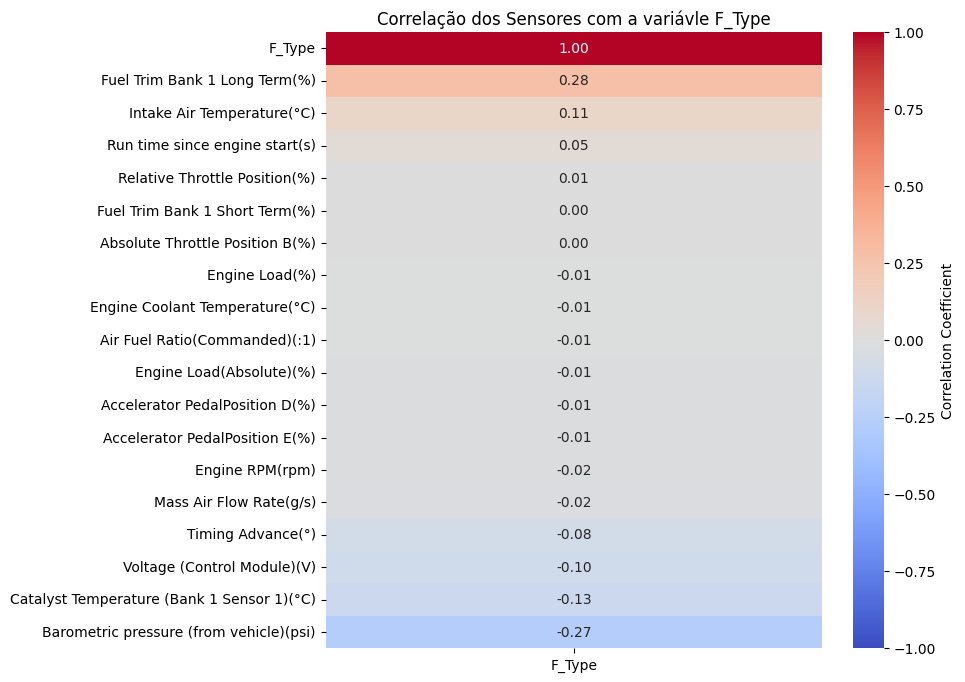

In [ ]:
corr_matrix = df_train_normalized.corr()

# Focar na correlação com 'F_Type'
focus_corr = corr_matrix[['F_Type']].sort_values(by='F_Type', ascending=False)

plt.figure(figsize=(8, 8))  # Ajuste o tamanho conforme necessário
sns.heatmap(focus_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlação dos Sensores com a variávle F_Type')
plt.show()

Variáveis selecionadas com base na correlação e disponibilidade dos sensores em carros reais:

In [ ]:
selected_columns = ['Fuel Trim Bank 1 Long Term(%)', 'Intake Air Temperature(°C)',
                    'Barometric pressure (from vehicle)(psi)',
                    'Catalyst Temperature (Bank 1 Sensor 1)(°C)',
                    'Voltage (Control Module)(V)', 'Timing Advance(°)']

# Treinamento do modelo

In [ ]:
print('Tamanho Dataset de Treino', df_train_normalized.shape)
print('Tamanho Dataset de Validação', df_valid_normalized.shape)
print('Tamanho Dataset de Teste', df_test_normalized.shape)

Tamanho Dataset de Treino (68244, 19)
Tamanho Dataset de Validação (8048, 19)
Tamanho Dataset de Teste (4027, 19)


In [ ]:
X_train = df_train_normalized[selected_columns]
y_train = df_train_normalized['F_Type']

X_valid = df_valid_normalized[selected_columns]
y_valid = df_valid_normalized['F_Type']

X_test = df_test_normalized[selected_columns]
y_test = df_test_normalized['F_Type']

In [ ]:
# Classificadores para testar
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Bernoulli)": BernoulliNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier()
}

In [ ]:
# Verificar o tamanho do conjunto de dados
print("Tamanho de X_train:", len(X_train))
print("Tamanho de y_train:", len(y_train))
print("Tamanho de X_test:", len(X_test))
print("Tamanho de y_test:", len(y_test))

# Verificar classes únicas em y_train e y_test
print("Classes únicas em y_train:", y_train.unique())
print("Classes únicas em y_test:", y_test.unique())

Tamanho de X_train: 68244
Tamanho de y_train: 68244
Tamanho de X_test: 4027
Tamanho de y_test: 4027
Classes únicas em y_train: [0 1]
Classes únicas em y_test: [1 0]


In [ ]:
# Testar os classificadores novamente
results = []

for name, clf in classifiers.items():
  print("Model name:", name)
  print(f"Classifier: {clf} \n")
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_valid)
  report = classification_report(y_valid, y_pred, output_dict=True)
  confusion = confusion_matrix(y_valid, y_pred)
  results.append({
      "Classificador": name,
      "Classification Report": report,
      "Matriz de Confusão": confusion
  })

Model name: Random Forest
Classifier: RandomForestClassifier() 

Model name: SVM
Classifier: SVC() 

Model name: Decision Tree
Classifier: DecisionTreeClassifier() 

Model name: KNN
Classifier: KNeighborsClassifier() 

Model name: Logistic Regression
Classifier: LogisticRegression() 

Model name: Naive Bayes (Gaussian)
Classifier: GaussianNB() 

Model name: Naive Bayes (Bernoulli)
Classifier: BernoulliNB() 

Model name: Gradient Boosting
Classifier: GradientBoostingClassifier() 

Model name: AdaBoost
Classifier: AdaBoostClassifier() 



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model name: Extra Trees
Classifier: ExtraTreesClassifier() 



In [ ]:
results_df = pd.DataFrame(results)

In [ ]:
results_df

,Classificador,Classification Report,Matriz de Confusão
0,Random Forest,"{'0': {'precision': 0.9353562005277045, 'recal...","[[3545, 483], [245, 3775]]"
1,SVM,"{'0': {'precision': 0.9108412322274881, 'recal...","[[3075, 953], [301, 3719]]"
2,Decision Tree,"{'0': {'precision': 0.8798174442190669, 'recal...","[[3470, 558], [474, 3546]]"
3,KNN,"{'0': {'precision': 0.9183222958057395, 'recal...","[[3328, 700], [296, 3724]]"
4,Logistic Regression,"{'0': {'precision': 0.6903496503496503, 'recal...","[[2468, 1560], [1107, 2913]]"
5,Naive Bayes (Gaussian),"{'0': {'precision': 0.797953216374269, 'recall...","[[2729, 1299], [691, 3329]]"
6,Naive Bayes (Bernoulli),"{'0': {'precision': 0.6898975109809663, 'recal...","[[2356, 1672], [1059, 2961]]"
7,Gradient Boosting,"{'0': {'precision': 0.901200111638292, 'recall...","[[3229, 799], [354, 3666]]"
8,AdaBoost,"{'0': {'precision': 0.8820541760722348, 'recal...","[[3126, 902], [418, 3602]]"
9,Extra Trees,"{'0': {'precision': 0.9377135348226019, 'recal...","[[3568, 460], [237, 3783]]"


# Testando Melhor Modelo

A escolha do modelo foi com base no f1-score alcançado e na facilidade de conversão do modelo.

Acurácia para o modelo Random Forest: 0.9126491053677932
Relatório da Classificação para o modelo Random Forest:
               precision    recall  f1-score   support

    Gasolina       0.94      0.89      0.91      4028
      Etanol       0.89      0.94      0.91      4020

    accuracy                           0.91      8048
   macro avg       0.91      0.91      0.91      8048
weighted avg       0.91      0.91      0.91      8048



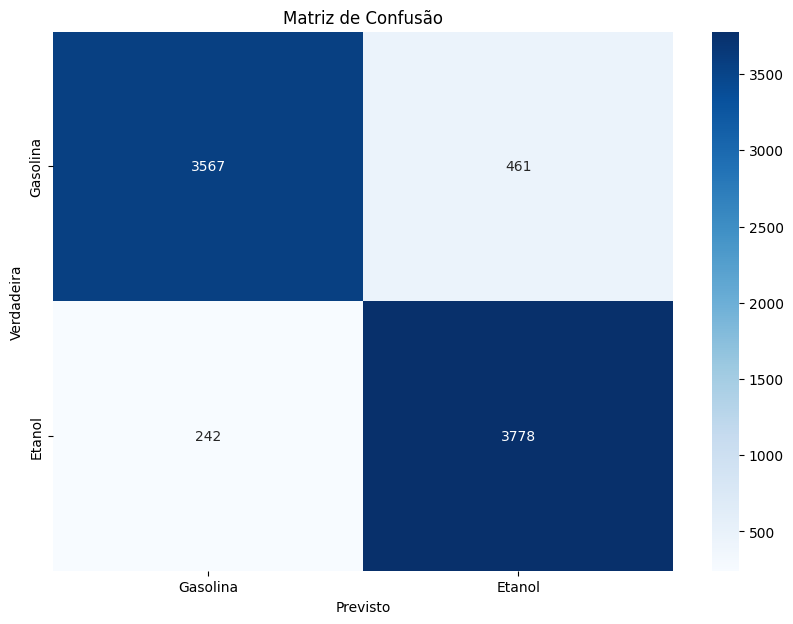

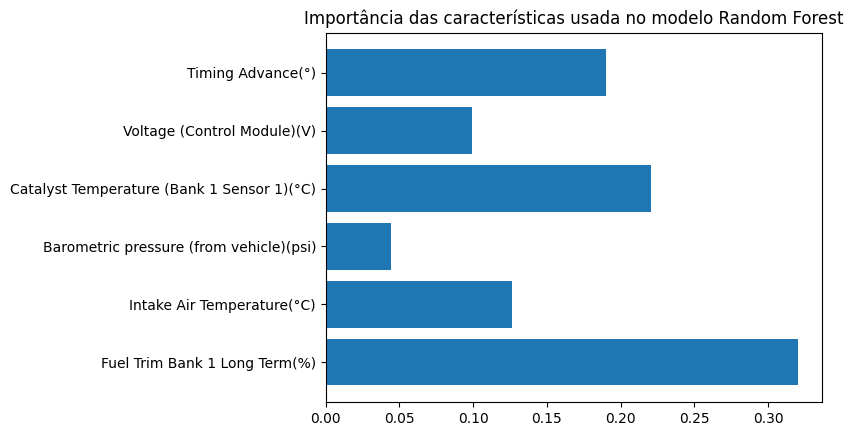

In [ ]:
# Criando e treinando o modelo de Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Fazendo predições no conjunto de teste
rf_pred = random_forest.predict(X_valid)

# Avaliando o modelo com a acurácia
rf_accuracy = accuracy_score(y_valid, rf_pred)
print('Acurácia para o modelo Random Forest:', rf_accuracy)

# Gerando o relatório de classificação
report = classification_report(y_valid, rf_pred, target_names=['Gasolina', 'Etanol'])
print('Relatório da Classificação para o modelo Random Forest:\n', report)

# Matriz de confusão
conf_mat = confusion_matrix(y_valid, rf_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', xticklabels=['Gasolina', 'Etanol'], yticklabels=['Gasolina', 'Etanol'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

# Importância das características
importances = random_forest.feature_importances_
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(X_train.columns)), X_train.columns)
plt.title('Importância das características usada no modelo Random Forest')
plt.show()

# Modelo a ser Embarcado

Aqui buscou-se diminuir o tamanho do modelo através da tecnica de poda, buscando simplificar o modelo.

Especificamente, o foco foi dados as seguintes variáveis:
- `max_depth`: Limitar a `max_depth` ajuda a controlar a complexidade das árvores de decisão, evitando que elas cresçam muito profundas e se tornem excessivamente específicas, o que pode levar a um melhor desempenho em dispositivos com recursos limitados.
- `n_estimators`: Diminuir o `n_estimators`, por sua vez, reduz o número total de árvores no modelo, o que diminui o uso de memória e o tempo necessário para a execução das inferências. Embora isso possa potencialmente reduzir a precisão do modelo.

Acurácia para o modelo Random Forest: 0.8469184890656064
Relatório da Classificação para o modelo Random Forest:
               precision    recall  f1-score   support

    Gasolina       0.89      0.79      0.84      4028
      Etanol       0.81      0.91      0.86      4020

    accuracy                           0.85      8048
   macro avg       0.85      0.85      0.85      8048
weighted avg       0.85      0.85      0.85      8048



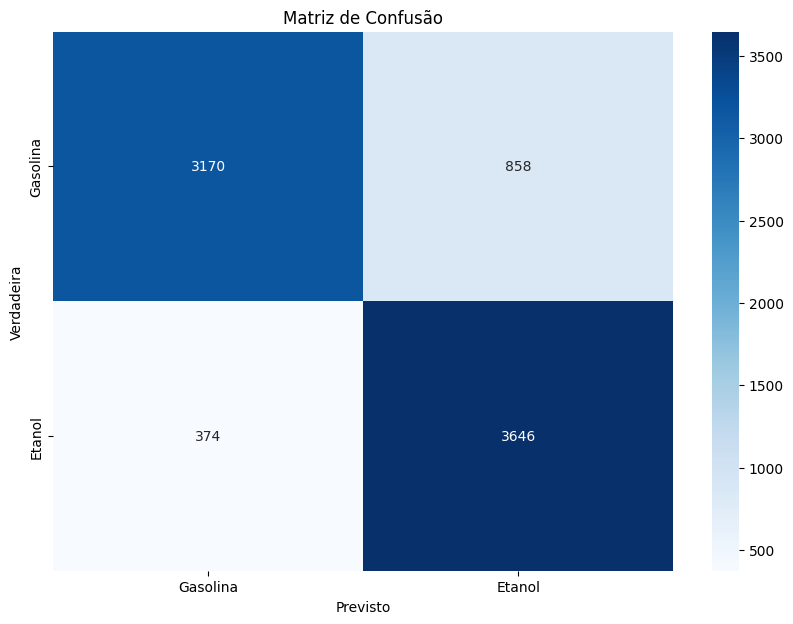

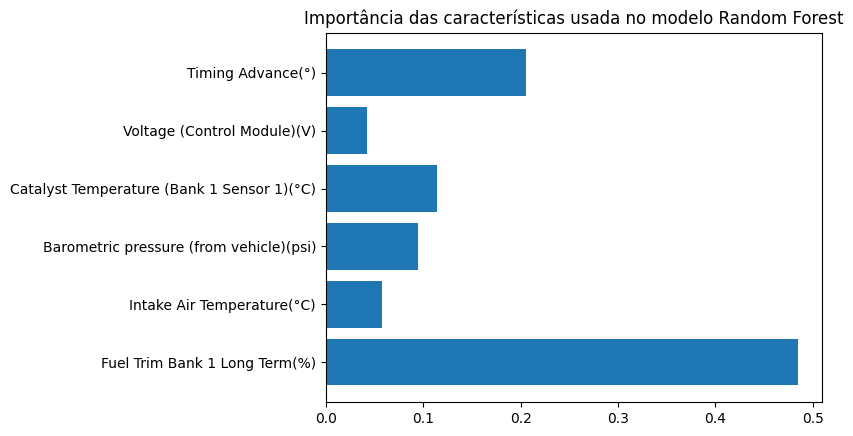

In [ ]:
# Criando novo modelo Random Forest
random_forest_emb = RandomForestClassifier(
    bootstrap=True,
    ccp_alpha=0.0,
    class_weight=None,
    criterion='gini',
    max_depth=8,
    max_features='sqrt',
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    monotonic_cst=None,
    n_estimators=80,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False,
)

random_forest_emb.fit(X_train, y_train)

# Fazendo predições no conjunto de teste
rf_pred = random_forest_emb.predict(X_valid)

# Avaliando o modelo com a acurácia
rf_accuracy = accuracy_score(y_valid, rf_pred)
print('Acurácia para o modelo Random Forest:', rf_accuracy)

# Gerando o relatório de classificação
report = classification_report(y_valid, rf_pred, target_names=['Gasolina', 'Etanol'])
print('Relatório da Classificação para o modelo Random Forest:\n', report)

# Matriz de confusão
conf_mat = confusion_matrix(y_valid, rf_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', xticklabels=['Gasolina', 'Etanol'], yticklabels=['Gasolina', 'Etanol'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

# Importância das características
importances = random_forest_emb.feature_importances_
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(X_train.columns)), X_train.columns)
plt.title('Importância das características usada no modelo Random Forest')
plt.show()

# Gerando modelo a ser embarcado

In [ ]:
!pip install micromlgen>=1.1.26

In [ ]:
from micromlgen import port, port_testset

In [ ]:
file_path = 'classifier.h'
with open(file_path, 'w') as file:
  file.write(port(random_forest_emb, classname='RandomForestClassifier', tmp_file='examples/RFC.json'))

In [ ]:
file_size_mb = (os.path.getsize(file_path)) / (1024 * 1024)
print(f"Memória ocupada por '{file_path}': {file_size_mb:.5f} MB")

Memória ocupada por 'classifier.h': 3.26869 MB
